In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from lazypredict.Supervised import LazyClassifier
from underthesea import word_tokenize, pos_tag, sent_tokenize
import regex
import demoji
from pyvi import ViPosTagger, ViTokenizer
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from underthesea import word_tokenize, pos_tag, sent_tokenize
import warnings
from gensim import corpora, models, similarities
import jieba
import re

In [2]:
products = pd.read_csv('product.csv')
products.head()

,Unnamed: 0,item_id,name,rating,price,brand,group
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,4.00,77000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,4.50,132000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,4.80,299000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...
3,3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,4.70,149000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...
4,4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,4.80,5090000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...


In [3]:
products = products.rename(columns = {'Unnamed: 0': 'index'})

In [4]:
products['name_description'] = pd.concat([products['brand'] + ' ' + products['name'] + ' ' + products['group']])

In [5]:
products.head()

,index,item_id,name,rating,price,brand,group,name_description
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,4.00,77000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,OEM Tai nghe Bluetooth Inpods 12 - Cảm biến vâ...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,4.50,132000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,OEM Tai nghe bluetooth không dây F9 True wirel...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,4.80,299000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,Logitech Chuột Không Dây Logitech M331 Silent ...
3,3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,4.70,149000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,Acome Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức ...
4,4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,4.80,5090000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,Apple Tai Nghe Bluetooth Apple AirPods Pro Tru...


### Underthesea

In [6]:
# Word_tokenize
products['name_description_wt'] = products['name_description'].apply(lambda x: word_tokenize(x, format = 'text'))

In [7]:
products.head()

,index,item_id,name,rating,price,brand,group,name_description,name_description_wt
0,0,48102821,Tai nghe Bluetooth Inpods 12 - Cảm biến vân ta...,4.00,77000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,OEM Tai nghe Bluetooth Inpods 12 - Cảm biến vâ...,OEM Tai_nghe Bluetooth_Inpods 12 - Cảm_biến vâ...
1,1,52333193,Tai nghe bluetooth không dây F9 True wireless ...,4.50,132000,OEM,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,OEM Tai nghe bluetooth không dây F9 True wirel...,OEM Tai_nghe bluetooth không dây F9_True wirel...
2,2,299461,Chuột Không Dây Logitech M331 Silent - Hàng Ch...,4.80,299000,Logitech,Thiết Bị Số - Phụ Kiện Số/Phụ kiện máy tính và...,Logitech Chuột Không Dây Logitech M331 Silent ...,Logitech Chuột Không Dây Logitech_M331_Silent ...
3,3,57440329,Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức - [[ 2...,4.70,149000,Acome,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,Acome Loa Bluetooth 5.0 Kiêm Đồng Hồ Báo Thức ...,Acome Loa Bluetooth_5.0_Kiêm Đồng_Hồ Báo_Thức ...
4,4,38458616,Tai Nghe Bluetooth Apple AirPods Pro True Wire...,4.80,5090000,Apple,Thiết Bị Số - Phụ Kiện Số/Thiết Bị Âm Thanh và...,Apple Tai Nghe Bluetooth Apple AirPods Pro Tru...,Apple Tai_Nghe Bluetooth_Apple_AirPods_Pro_Tru...


In [8]:
# Postag
products_postag = products['name_description_wt'].apply(lambda x: pos_tag(x))

In [9]:
products_postag

0       [(OEM, Np), (Tai_nghe Bluetooth_Inpods, Np), (...
1       [(OEM, Np), (Tai_nghe, Np), (bluetooth, V), (k...
2       [(Logitech, Np), (Chuột, Np), (Không, R), (Dây...
3       [(Acome, Np), (Loa, Np), (Bluetooth_5, Np), (....
4       [(Apple, Np), (Tai_Nghe Bluetooth_Apple_AirPod...
                              ...                        
4396    [(LG, Np), (Máy_Lạnh, Np), (LG, Np), (Inverter...
4397    [(OEM, Np), (Micro, Np), (Không, R), (Dây, Np)...
4398    [(Electrolux, N), (Máy, N), (sấy, N), (Electro...
4399    [(Pacific, Np), (Bộ, Np), (Chia, Np), (2, M), ...
4400    [(Shubole, Np), (Micro, Np), (Đôi_Karaoke, Np)...
Name: name_description_wt, Length: 4401, dtype: object

### Gensim

In [10]:
# Tokenize(split) the sentences into words
products_gem = [[text for text in x.split()] for x in products['name_description_wt']]

In [11]:
len(products_gem)

4401

In [12]:
products_gem[:1]

[['OEM',
  'Tai_nghe',
  'Bluetooth_Inpods',
  '12',
  '-',
  'Cảm_biến',
  'vân',
  'tay',
  ',',
  'chống',
  'nước',
  ',',
  'màu_sắc',
  'đa_dạng',
  '-',
  '5',
  'màu_sắc',
  'lựa_chọn',
  'Thiết_Bị',
  'Số',
  '-',
  'Phụ_Kiện',
  'Số',
  '/',
  'Thiết_Bị',
  'Âm_Thanh',
  'và',
  'Phụ_Kiện',
  '/',
  'Tai_Nghe',
  'Bluetooth',
  '/',
  'Tai_Nghe',
  'Bluetooth_Nhét_Tai']]

In [13]:
STOP_WORD_FILE = 'vietnamese-stopwords.txt'

In [14]:
with open(STOP_WORD_FILE, 'r', encoding = 'utf-8') as file:
    stop_words = file.read()
    
stop_words = stop_words.split('\n')

In [15]:
# remove some special elements in texts
products_gem_re = [[re.sub('[0-9]+','', e) for e in text] for text in products_gem] # số
products_gem_re = [[t.lower() for t in text if not t in ['', ' ', ',', '.', '...', '-',':', ';', '?', '%', '(', ')', '+', '/', 'g', 'ml']] for text in  products_gem_re] # ký tự đặc biệt
products_gem_re = [[t for t in text if not t in stop_words] for text in products_gem_re] # stopword
# ...

In [16]:
products_gem_re[:1]

[['oem',
  'tai_nghe',
  'bluetooth_inpods',
  'cảm_biến',
  'vân',
  'chống',
  'màu_sắc',
  'đa_dạng',
  'màu_sắc',
  'lựa_chọn',
  'thiết_bị',
  'phụ_kiện',
  'thiết_bị',
  'âm_thanh',
  'phụ_kiện',
  'tai_nghe',
  'bluetooth',
  'tai_nghe',
  'bluetooth_nhét_tai']]

In [17]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
dictionary = corpora.Dictionary(products_gem_re)

In [18]:
dictionary.token2id

{'bluetooth': 0,
 'bluetooth_inpods': 1,
 'bluetooth_nhét_tai': 2,
 'chống': 3,
 'cảm_biến': 4,
 'lựa_chọn': 5,
 'màu_sắc': 6,
 'oem': 7,
 'phụ_kiện': 8,
 'tai_nghe': 9,
 'thiết_bị': 10,
 'vân': 11,
 'âm_thanh': 12,
 'đa_dạng': 13,
 'báo': 14,
 'dock_sạc': 15,
 'dây': 16,
 'f_true': 17,
 'không': 18,
 'kép': 19,
 'led': 20,
 'pin': 21,
 'wireless': 22,
 'chuột': 23,
 'hàng': 24,
 'hãng': 25,
 'laptop': 26,
 'logitech': 27,
 'logitech_m_silent': 28,
 'máy_tính': 29,
 'phím': 30,
 'văn_phòng': 31,
 '[': 32,
 ']_]': 33,
 'acome': 34,
 'bluetooth_._kiêm': 35,
 'báo_thức': 36,
 'loa': 37,
 'nhạc': 38,
 'robot': 39,
 'đồng_hồ': 40,
 'a': 41,
 'apple': 42,
 'bluetooth_apple_airpods_pro_true_wireless': 43,
 'mwp': 44,
 'true_wireless': 45,
 'vn': 46,
 'airpods': 47,
 'nhét': 48,
 'tai': 49,
 'csi': 50,
 'jbl': 51,
 'bảng': 52,
 'c': 53,
 'cổng': 54,
 'di_động': 55,
 'dự_phòng': 56,
 'in': 57,
 'mah': 58,
 'pblmz': 59,
 'sạc': 60,
 'tích_hợp': 61,
 'usb_type': 62,
 'w': 63,
 'xiaomi': 64,
 'xia

In [19]:
# Numbers of features (word) in dictionary
feature_cnt = len(dictionary.token2id)

In [20]:
feature_cnt

6342

In [21]:
# Obtain corpus based on dictionary (dense_matrix)
corpus = [dictionary.doc2bow(text) for text in products_gem_re]

In [22]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 2),
 (9, 3),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1)]

In [23]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# Tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features = feature_cnt)

### Khi người dùng chọn sản phẩm số 10001355

In [24]:
product_ID = 10001355
product = products[products.item_id == product_ID].head(1)

In [25]:
type(product['name'])

pandas.core.series.Series

In [51]:
product[['index', 'item_id', 'name' ,'name_description']]

,index,item_id,name,name_description
2689,2689,10001355,RAM Laptop Hynix 4GB DDR4 2400MHz SODIMM - Hàn...,Hynix RAM Laptop Hynix 4GB DDR4 2400MHz SODIMM...


In [27]:
# Sản phẩm đang xem
name_description_pre = product['name_description'].to_string(index = False)

In [28]:
name_description_pre

'Hynix RAM Laptop Hynix 4GB DDR4 2400MHz SODIMM ...'

### Đề xuất cho sản phẩm đang xem

In [29]:
def recommender(view_product, dictionary, tfidf, index):
    # Convert search words into Sparse Vectors
    view_product = view_product.lower().split()
    kw_vector = dictionary.doc2bow(view_product)
    print("View product's vector:")
    print(kw_vector)
    # Similarity calculation
    sim = index[tfidf[kw_vector]]
    
    # Print result
    list_id = []
    list_score = []
    for i in range(len(sim)):
        list_id.append(i)
        list_score.append(sim[i])
        
    df_result = pd.DataFrame({'id' : list_id,
                             'score' : list_score})
    
    # Five highest scores
    five_highest_score = df_result.sort_values(by = 'score', ascending = False).head(6)
    print('Five highest scores:')
    print(five_highest_score)
    print('Ids to list:')
    idToList = list(five_highest_score['id'])
    print(idToList)
    
    products_find = products[products.index.isin(idToList)]
    results = products_find[['index', 'item_id', 'name']]
    results = pd.concat([results, five_highest_score], axis = 1).sort_values(by = 'score', ascending = False)
    return results

In [30]:
results = recommender(name_description_pre, dictionary, tfidf, index)

View product's vector:
[(26, 1), (3415, 1), (3530, 1), (3872, 2)]
Five highest scores:
        id  score
2536  2536   0.64
2689  2689   0.64
2504  2504   0.64
2693  2693   0.64
2813  2813   0.53
2475  2475   0.53
Ids to list:
[2536, 2689, 2504, 2693, 2813, 2475]


In [31]:
# Recommender 5 similarity products for selected product
# Check and remove the selected product from the results
results = results[results.item_id != product_ID]
results

,index,item_id,name,id,score
2504,2504,10001377,RAM Laptop Hynix 8GB DDR4 2666MHz SODIMM - Hàn...,2504,0.64
2536,2536,10001357,RAM Laptop Hynix 8GB DDR4 2400MHz SODIMM - Hàn...,2536,0.64
2693,2693,10001334,RAM Laptop Hynix 8GB DDR4 2133MHz SODIMM - Hàn...,2693,0.64
2475,2475,10001388,RAM Laptop Hynix 8GB DDR3L Bus 1600MHz - Hàng ...,2475,0.53
2813,2813,58116278,RAM Laptop DDR4 Hynix 8GB Bus 3200 - Hàng Nhập...,2813,0.53


### Cosine Similarity

In [32]:
tf = TfidfVectorizer(analyzer = 'word', min_df = 0, stop_words = stop_words)

In [33]:
tfidf_matrix = tf.fit_transform(products.name_description_wt)

In [34]:
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [35]:
cosine_similarities

array([[1.        , 0.35314111, 0.03365436, ..., 0.        , 0.02362634,
        0.02027877],
       [0.35314111, 1.        , 0.11560662, ..., 0.        , 0.02694832,
        0.06339568],
       [0.03365436, 0.11560662, 1.        , ..., 0.        , 0.02609145,
        0.10291089],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.02148049,
        0.02576626],
       [0.02362634, 0.02694832, 0.02609145, ..., 0.02148049, 1.        ,
        0.08471524],
       [0.02027877, 0.06339568, 0.10291089, ..., 0.02576626, 0.08471524,
        1.        ]])

In [36]:
df_show = pd.DataFrame(cosine_similarities)
df_show

,0,1,2,3,4,5,6,7,8,9,...,4391,4392,4393,4394,4395,4396,4397,4398,4399,4400
0,1.00,0.35,0.03,0.07,0.33,0.31,0.25,0.02,0.24,0.03,...,0.05,0.00,0.02,0.00,0.03,0.00,0.04,0.00,0.02,0.02
1,0.35,1.00,0.12,0.11,0.41,0.40,0.31,0.08,0.31,0.12,...,0.10,0.00,0.02,0.00,0.03,0.00,0.10,0.00,0.03,0.06
2,0.03,0.12,1.00,0.05,0.05,0.05,0.11,0.04,0.10,0.88,...,0.05,0.00,0.02,0.00,0.02,0.00,0.13,0.00,0.03,0.10
3,0.07,0.11,0.05,1.00,0.11,0.12,0.06,0.03,0.06,0.05,...,0.32,0.00,0.38,0.00,0.07,0.00,0.04,0.00,0.03,0.03
4,0.33,0.41,0.05,0.11,1.00,0.70,0.34,0.03,0.33,0.05,...,0.06,0.00,0.04,0.00,0.04,0.00,0.04,0.00,0.04,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4396,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.03,0.03,0.03,0.02,1.00,0.04,0.03,0.02,0.03
4397,0.04,0.10,0.13,0.04,0.04,0.04,0.08,0.01,0.08,0.13,...,0.31,0.04,0.08,0.03,0.17,0.04,1.00,0.03,0.11,0.54
4398,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.09,0.03,0.83,0.02,0.03,0.03,1.00,0.02,0.03
4399,0.02,0.03,0.03,0.03,0.04,0.03,0.03,0.01,0.03,0.03,...,0.08,0.02,0.08,0.02,0.08,0.02,0.11,0.02,1.00,0.08


In [37]:
cosine_similarities.shape

(4401, 4401)

In [38]:
results = {}

for idx, row in products.iterrows():
    similar_indices = cosine_similarities[idx].argsort()[-10:-1]
    similar_items = [(cosine_similarities[idx][i], products['item_id'][i]) for i in similar_indices]
    results[row['item_id']] = similar_items[1:]

In [39]:
results[10001355]

[(0.7799983487855345, 10001353),
 (0.7799983487855345, 10001324),
 (0.7799983487855345, 10001326),
 (0.7799983487855345, 10001373),
 (0.7979799959638644, 10001388),
 (0.8528356024939454, 10001377),
 (0.8528356024939454, 10001334),
 (0.8528356024939454, 10001357)]

In [49]:
# Lấy thông tin sản phẩm
def item(id):
    return products.loc[products['item_id'] == id]['name'].to_list()[0].split('-')[0]

# Thông tin sản phẩm gợi ý
def recommend(item_id, num):
    print('Recommending ' + str(num) + ' products similar to ' + item(item_id) + '...')
    print('* '* 40)
    recs = results[item_id][:num]
    recs = sorted(recs, key = lambda x:x[0], reverse = True)
    for rec in recs:
        print(rec[1])
        print('Recommended: product id:' + str(rec[1]) + ', ' + item(rec[1]) + ' (score:)' + str(rec[0]) + ')')

In [50]:
recommend(10001355, 10)

Recommending 10 products similar to RAM Laptop Hynix 4GB DDR4 2400MHz SODIMM ...
* * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * 
10001377
Recommended: product id:10001377, RAM Laptop Hynix 8GB DDR4 2666MHz SODIMM  (score:)0.8528356024939454)
10001334
Recommended: product id:10001334, RAM Laptop Hynix 8GB DDR4 2133MHz SODIMM  (score:)0.8528356024939454)
10001357
Recommended: product id:10001357, RAM Laptop Hynix 8GB DDR4 2400MHz SODIMM  (score:)0.8528356024939454)
10001388
Recommended: product id:10001388, RAM Laptop Hynix 8GB DDR3L Bus 1600MHz  (score:)0.7979799959638644)
10001353
Recommended: product id:10001353, RAM Laptop Samsung 16GB DDR4 2400MHz SODIMM  (score:)0.7799983487855345)
10001324
Recommended: product id:10001324, RAM Laptop Samsung 4GB DDR4 2133MHz SODIMM  (score:)0.7799983487855345)
10001326
Recommended: product id:10001326, RAM Laptop Samsung 8GB DDR4 2133MHz SODIMM  (score:)0.7799983487855345)
10001373
Recommended: product id:10001373,

In [42]:
from wordcloud import WordCloud

In [43]:
def get_product_text(item_id, num):
    rcmd_ids = [r[1] for r in results[item_id]] + [item_id]
    text = (products[products.item_id.isin(rcmd_ids)])
    return ' '.join(text.name)

In [44]:
wordcloud_text = get_product_text(10001355, 10)

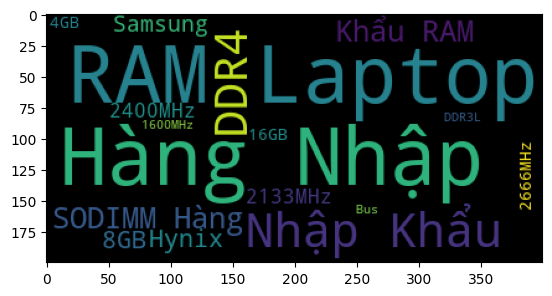

In [45]:
wc = WordCloud(stopwords = stop_words).generate(wordcloud_text)
plt.imshow(wc)

### Lưu kết quả

In [46]:
info = []
for p_id, v in results.items():
    for item in v:
        info.append({
            'product_id': p_id,
            'rcmd_product_id': item[1],
            'score': item[0]
        })
        
content_based_df = pd.DataFrame(info)

In [47]:
content_based_df.to_csv('CB_new.csv')